In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout
from keras.models import Model, Sequential
from keras import optimizers
from keras.regularizers import l2
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
num_data = 200
a = 2
b = 300
noise_scale = 100

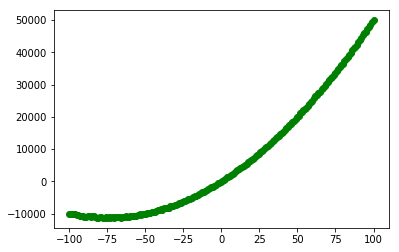

In [31]:
x = np.linspace(-100, 100, num=num_data)
y = a*x + b
y = a*x**2 + b*x

np.save("x.npy", x)
np.save("y.npy", y)

noise = np.random.normal(size=num_data)
y = y + noise_scale * noise
plt.scatter(x, y, c='green')

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
print(x_train.shape)
print(y_train.shape)

(134,)
(134,)


In [9]:
reg = None # l2(l=0.1)

inp = Input(shape=(1,), name="input")
h1 = Dense(units=10, activation='relu', kernel_regularizer=reg)(inp)
h2 = Dense(units=100, activation='relu', kernel_regularizer=reg)(h1)
#drop = Dropout(0.5)(h2)
out = Dense(units=1, activation='linear')(h2)
model = Model(inputs=inp, outputs=out)

opt = optimizers.Adam(lr=1e-1)
#opt = optimizers.SGD(lr=1e-2)
model.compile(loss='mse', optimizer=opt)

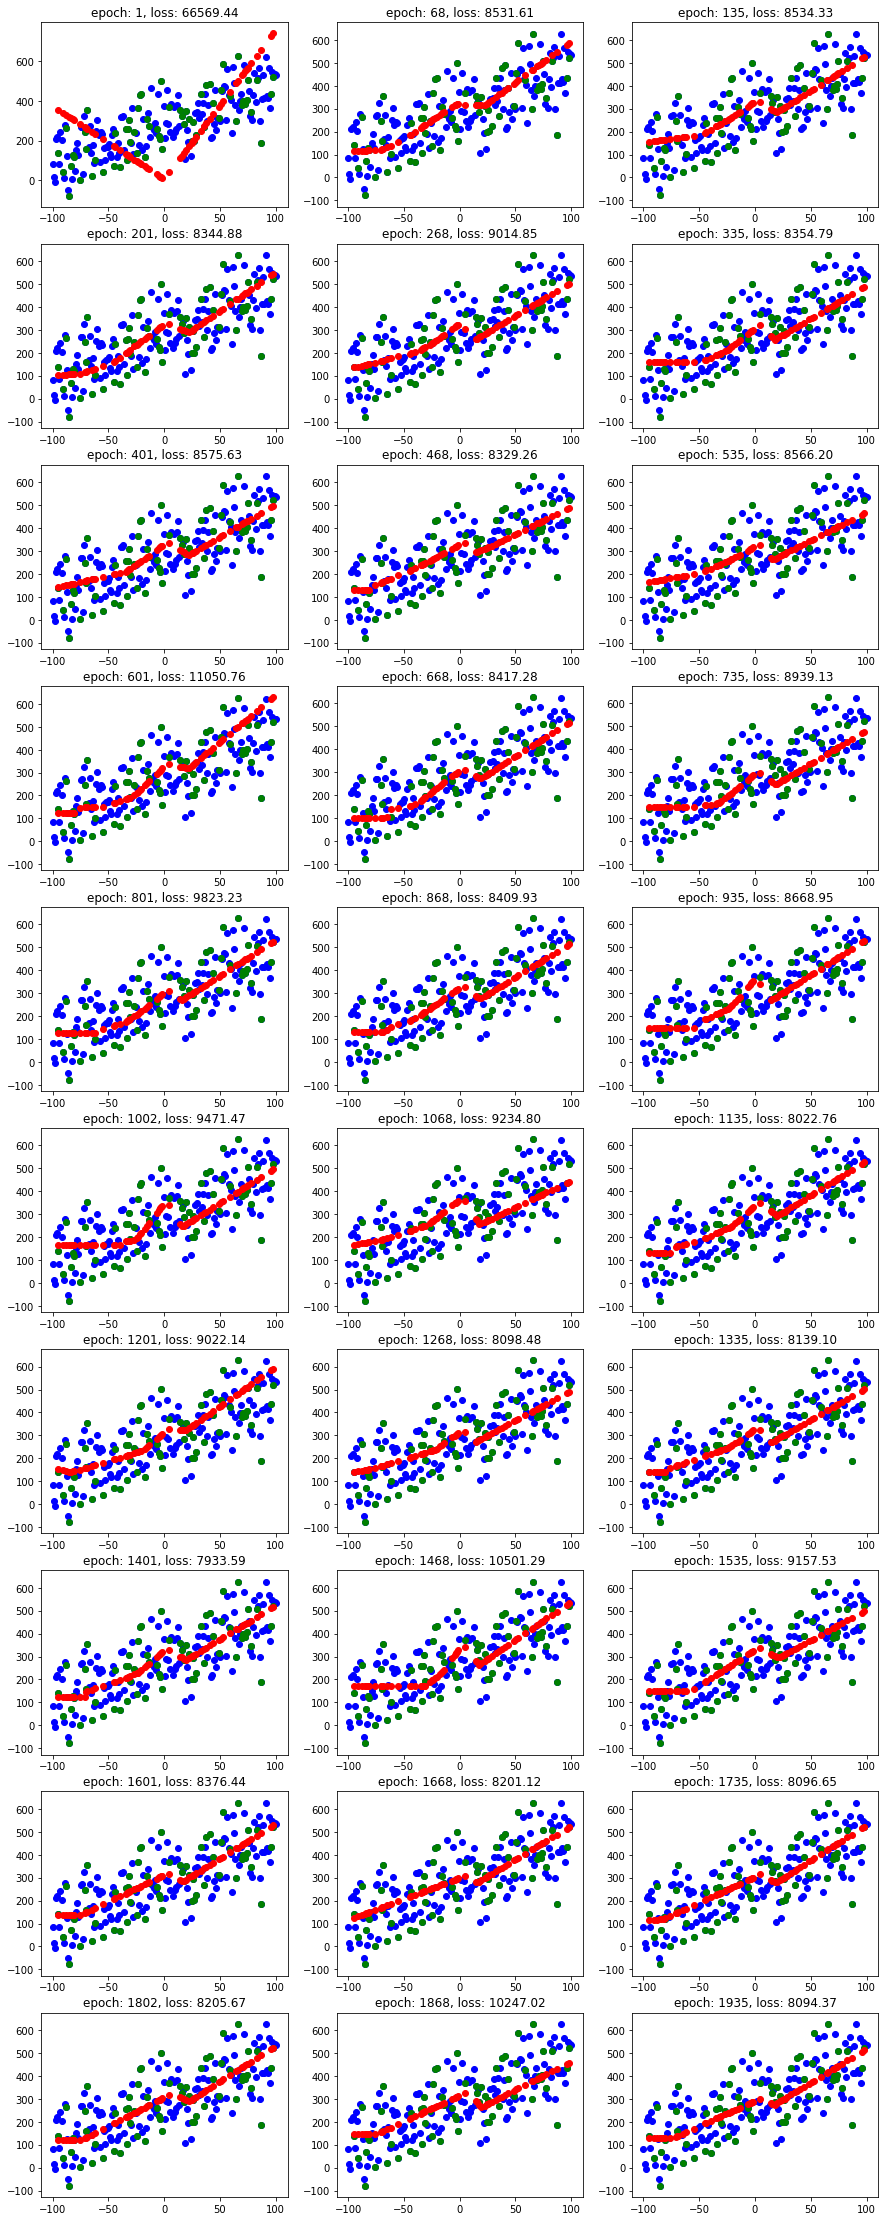

In [10]:
prev_ind = 0
epochs = 2000
plot_cols = 3
num_plots = plot_cols * 10

plot_rows = int(num_plots/plot_cols)
f, subs = plt.subplots(plot_rows, plot_cols, figsize=(15, 4*plot_rows))
subs = subs.ravel()
plot_counter = 0

num_intervals = epochs / num_plots

for i in tqdm(range(epochs)):
    hist = model.fit(x_train, y_train, verbose=False)
    y_predict = model.predict(x_test)

    if i >= plot_counter * num_intervals:
        subs[plot_counter].scatter(x, y, c='blue')
        subs[plot_counter].scatter(x_test, y_test, c='green')
        subs[plot_counter].scatter(x_test, y_predict, c='red')
        subs[plot_counter].set_title(f"epoch: {i+1}, loss: {hist.history['loss'][0]:.2f}")
        plot_counter += 1